In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

import warnings
warnings.filterwarnings ('ignore')

In [126]:
df = pd.read_csv ('heart_disease_data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [128]:
df.shape

(303, 14)

In [129]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [130]:
df.duplicated().sum()

1

In [131]:
df = df.drop_duplicates()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [132]:
df.duplicated ().sum()

0

In [133]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [134]:
# Check the distribution of Target Variable
df ['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

1 represents a defective heart
0 represents a healthy heart

In [135]:
# Splitting the features from the target
y = df ['target']
x = df.drop (['target'], axis = 1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [136]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

                                             |                                             | [  0%]   00:00 ->…


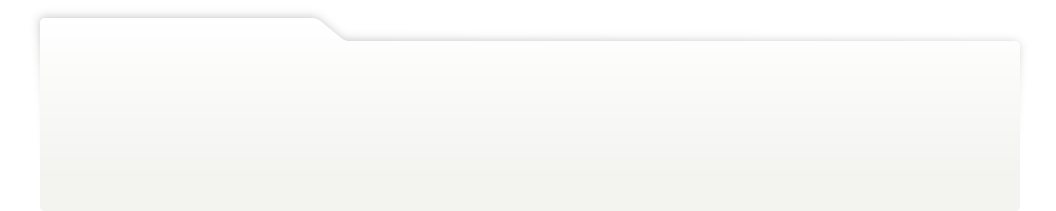
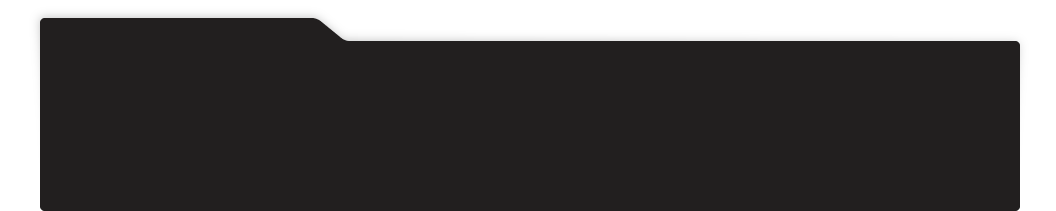
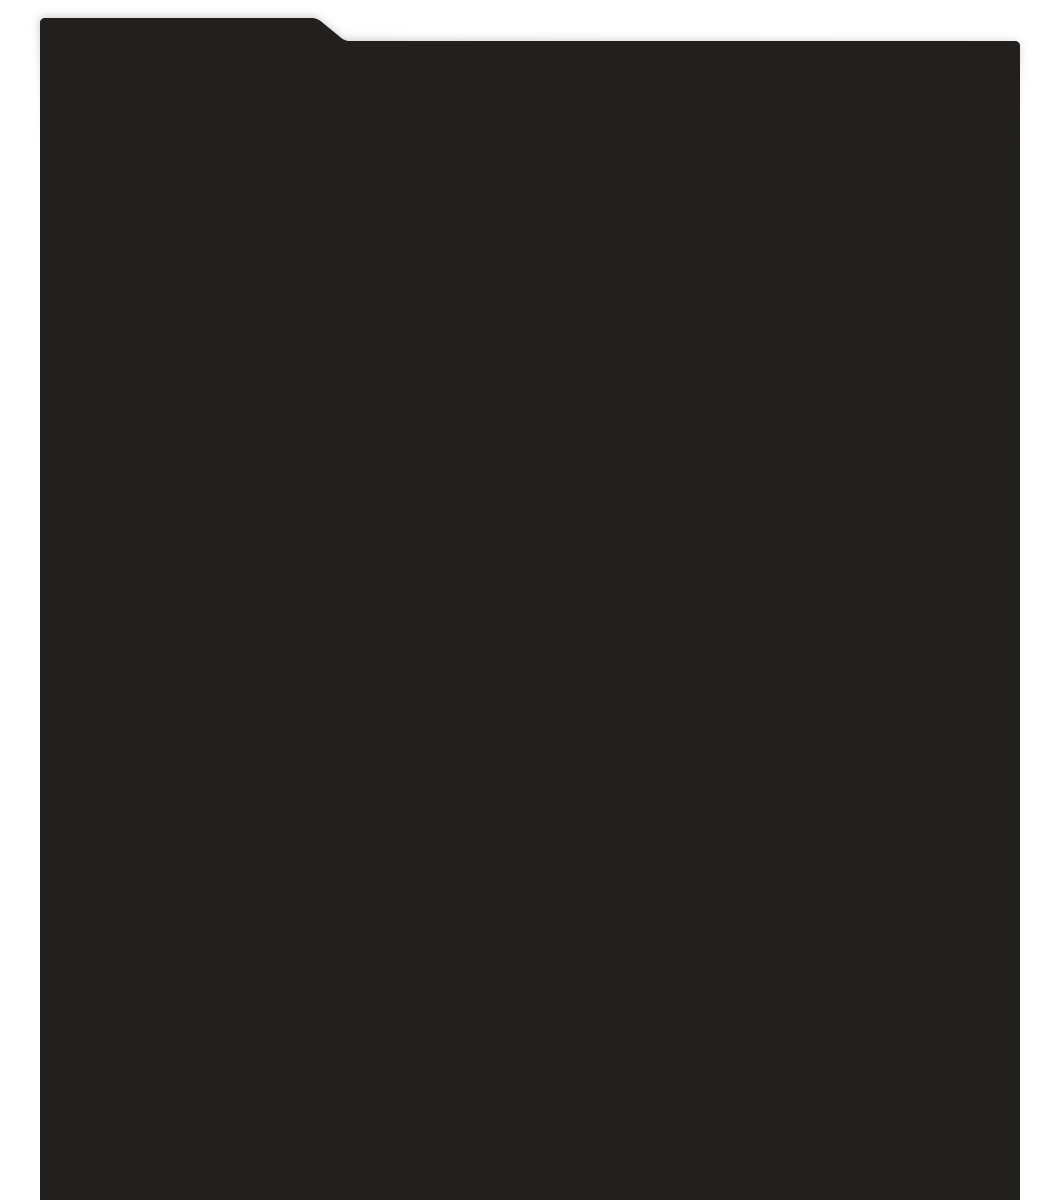
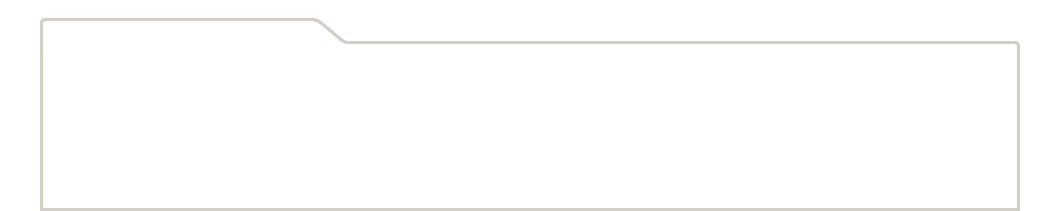
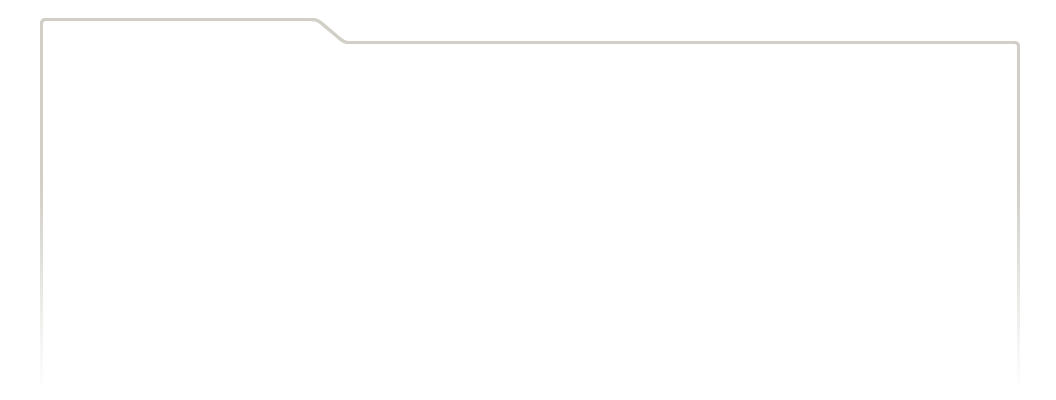
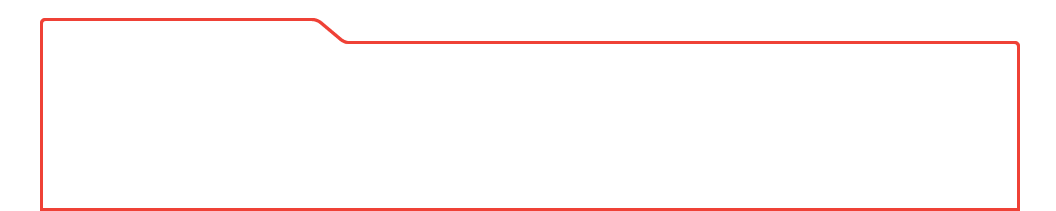
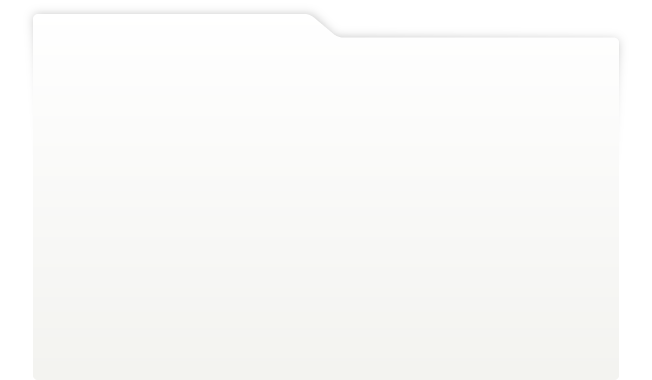
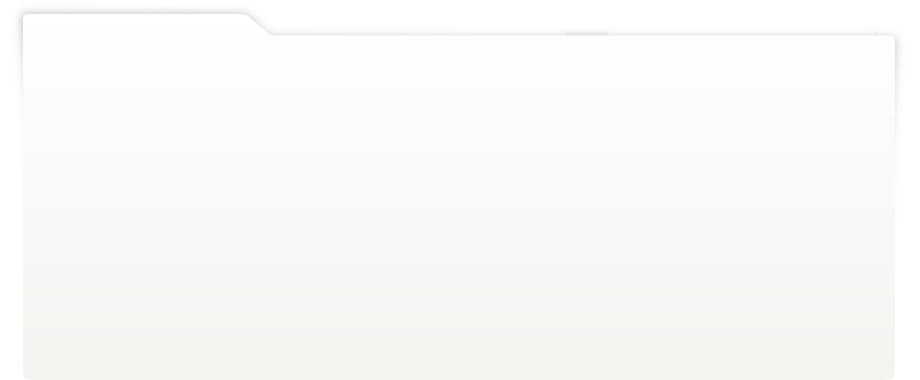
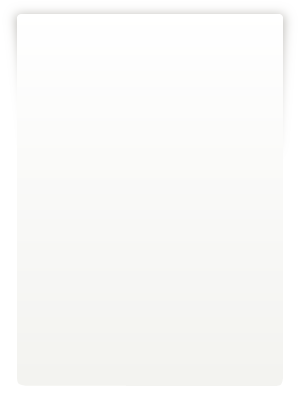
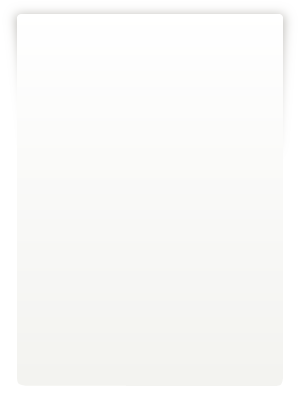
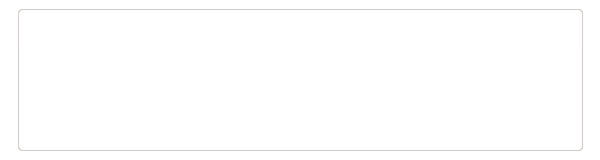
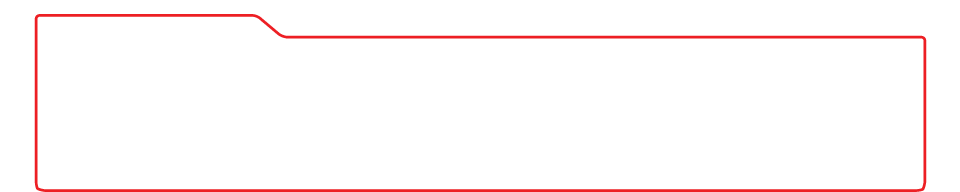
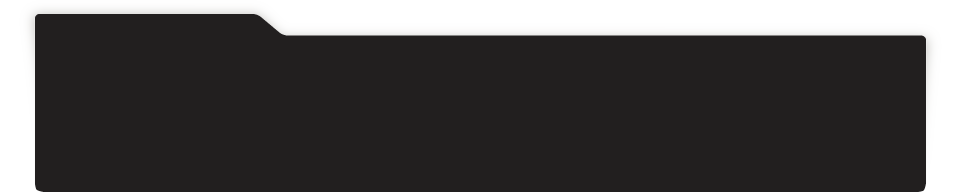
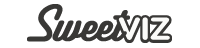
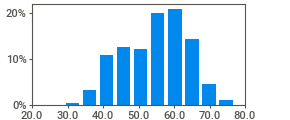
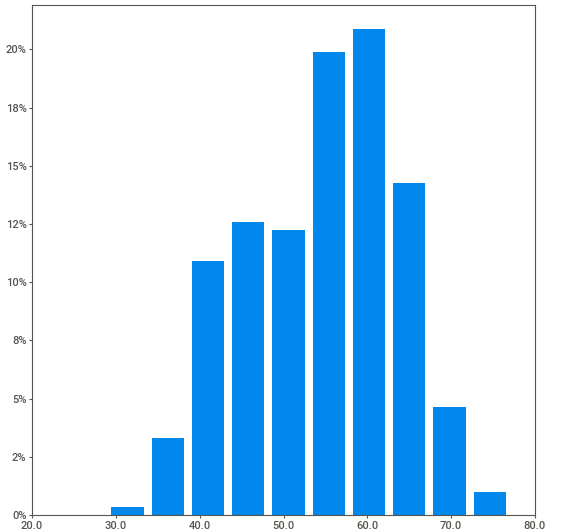
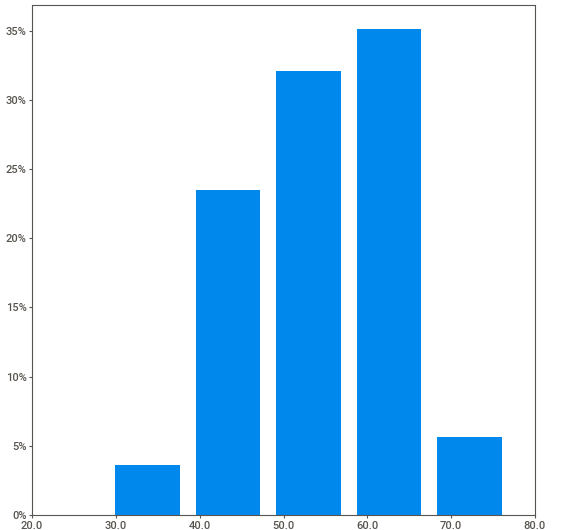
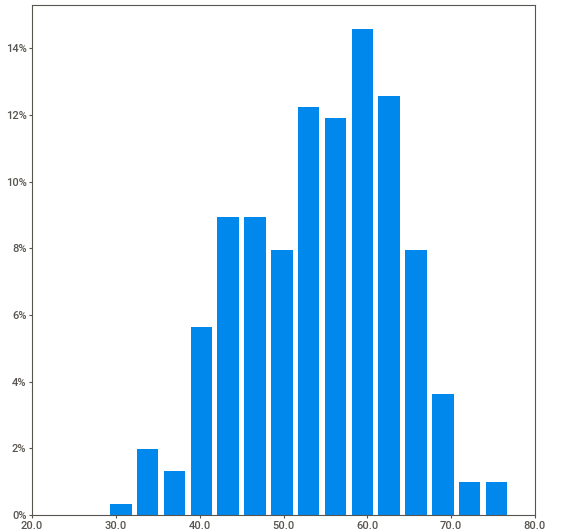
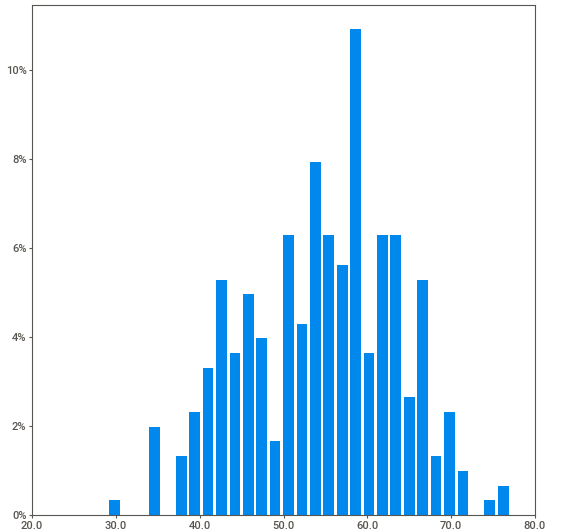
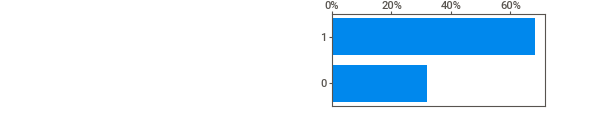
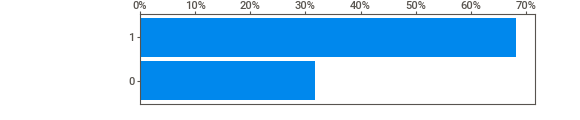
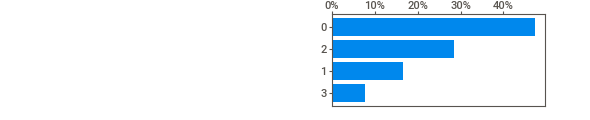
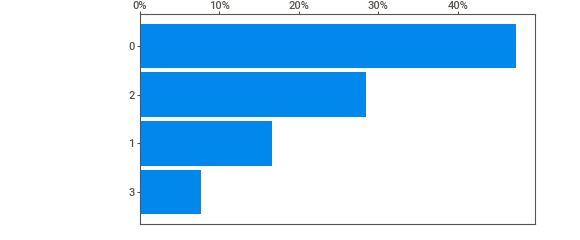
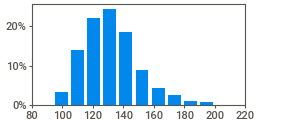
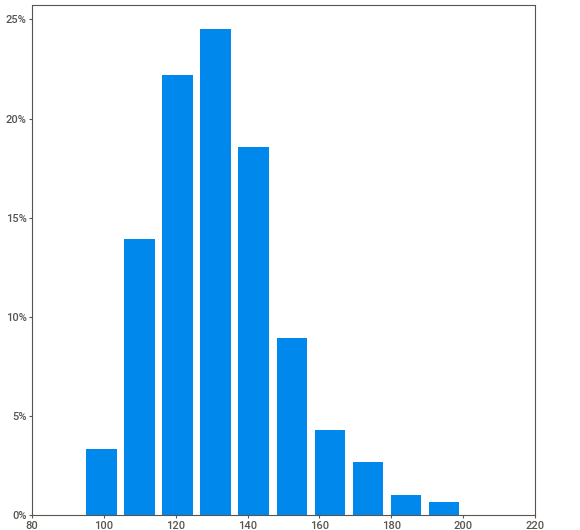
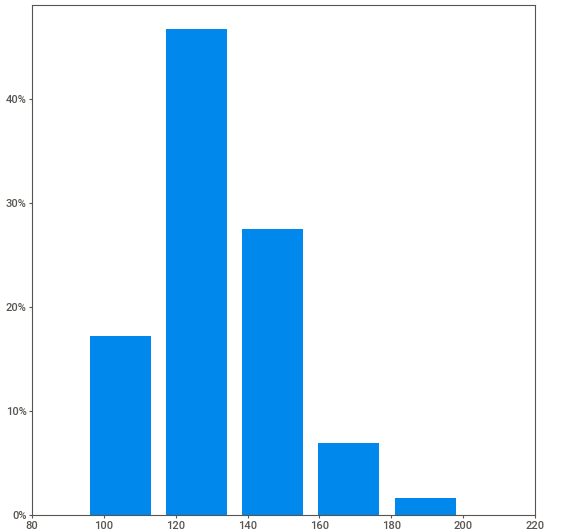
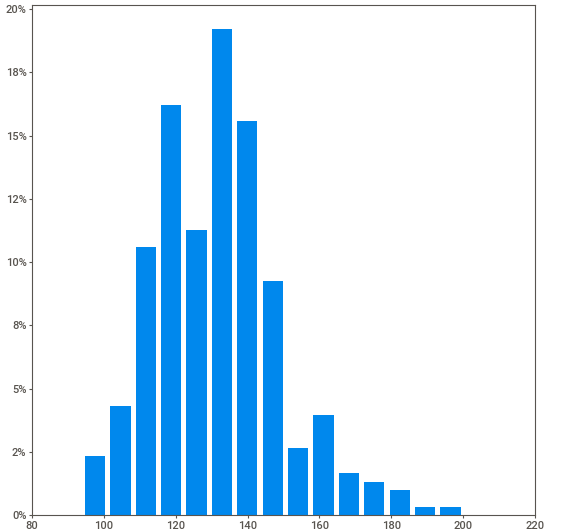
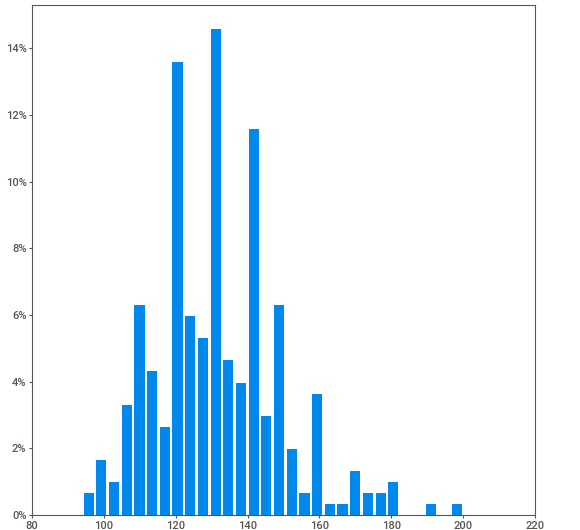
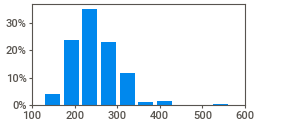
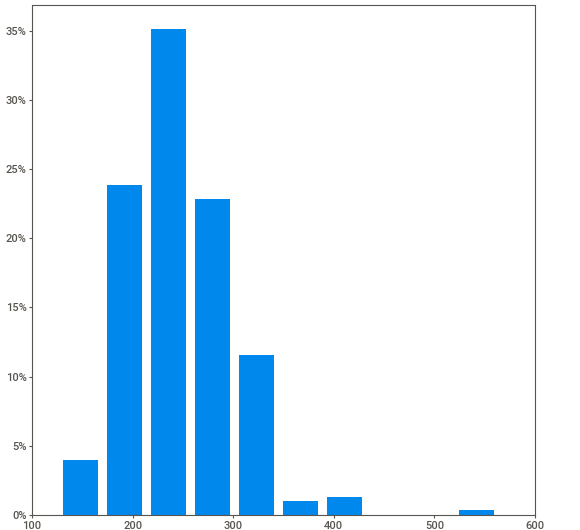
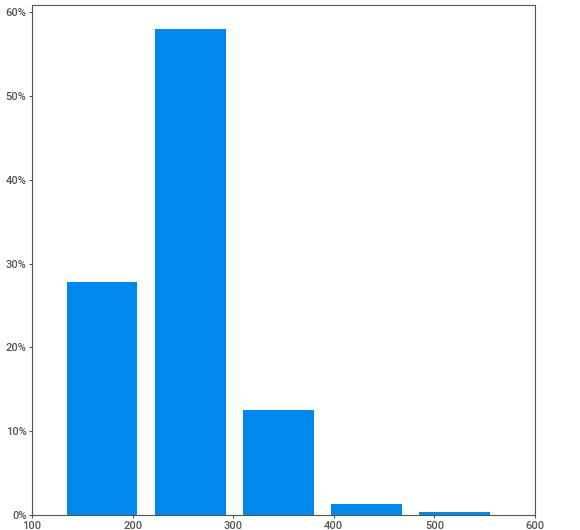
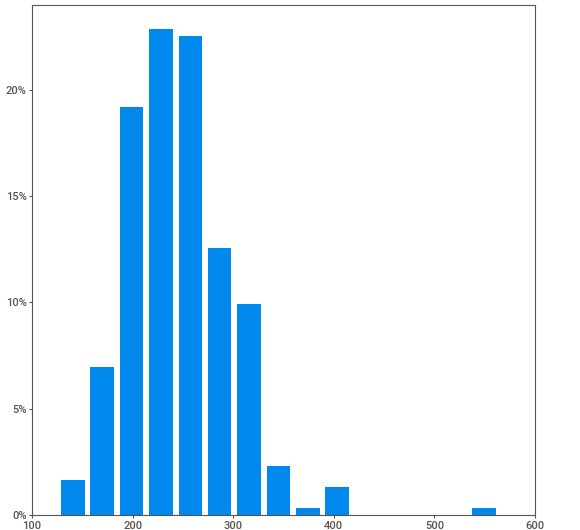
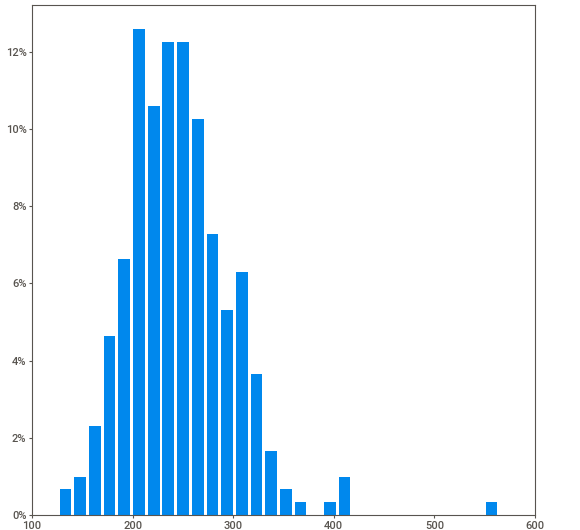
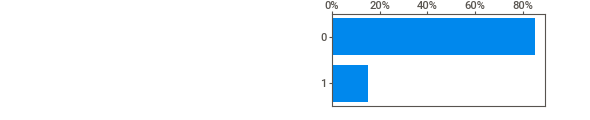
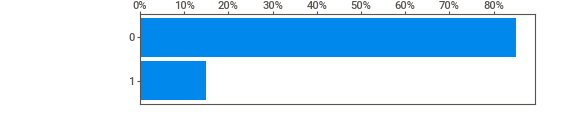
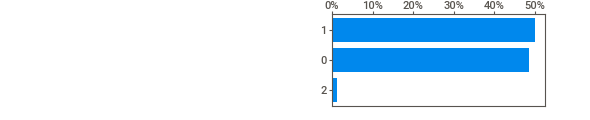
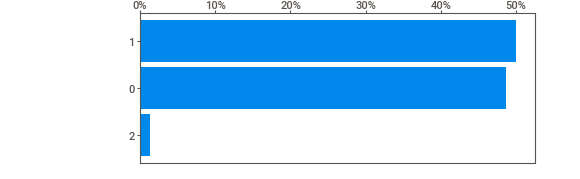
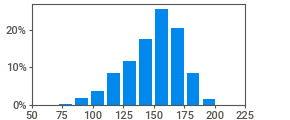
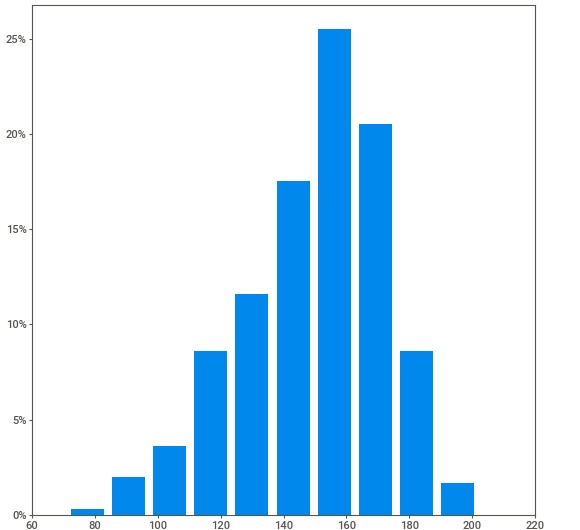
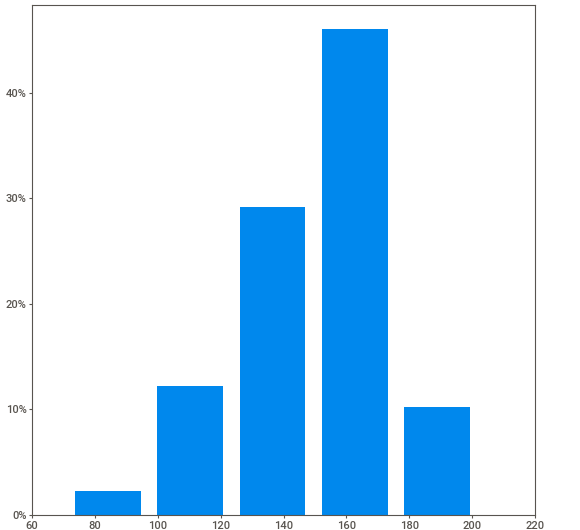
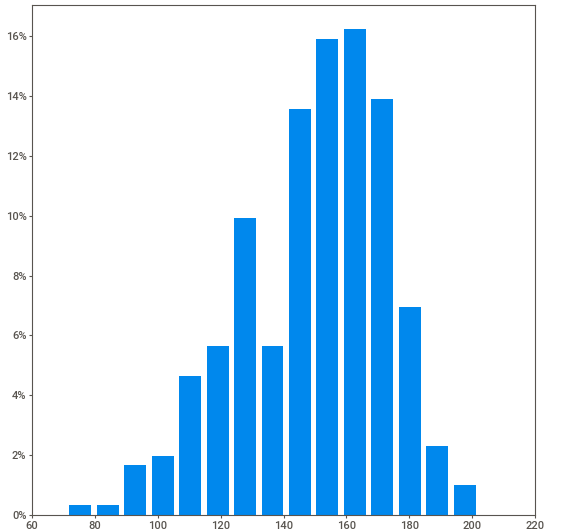
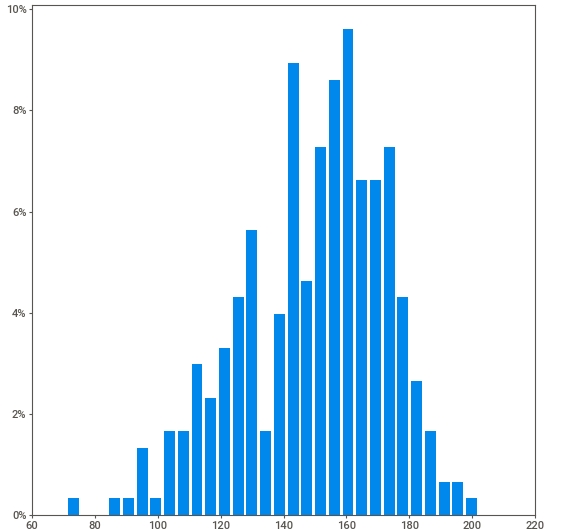
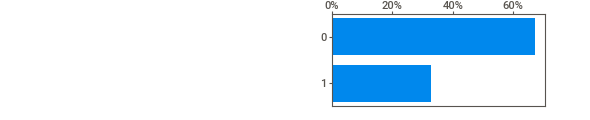
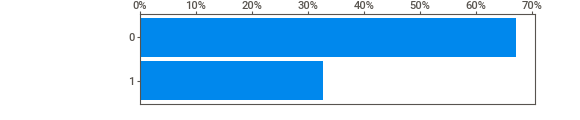
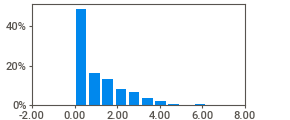
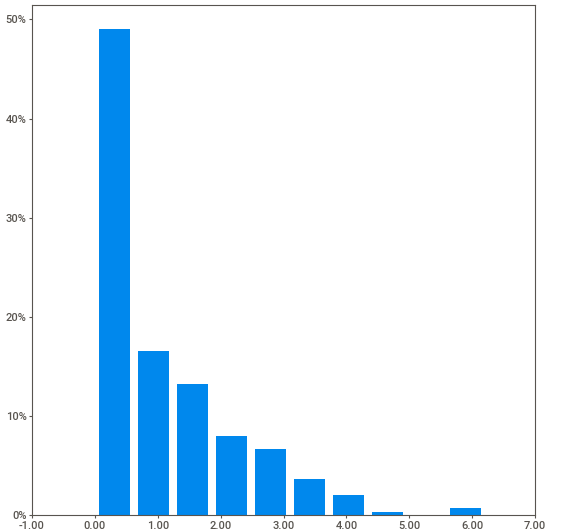
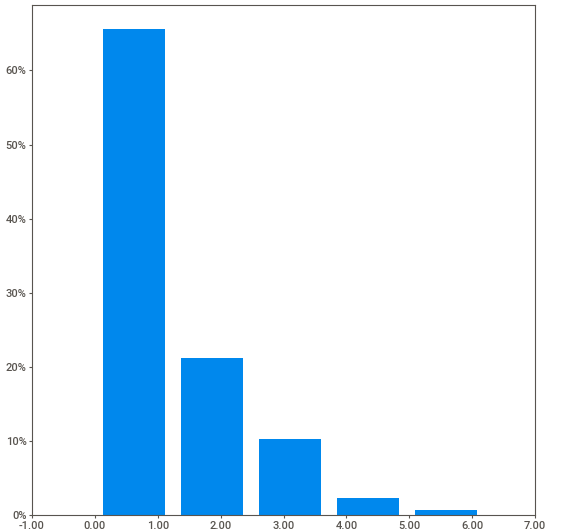
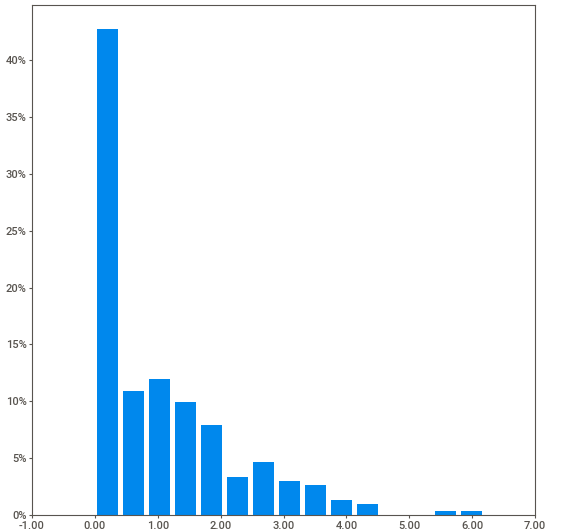
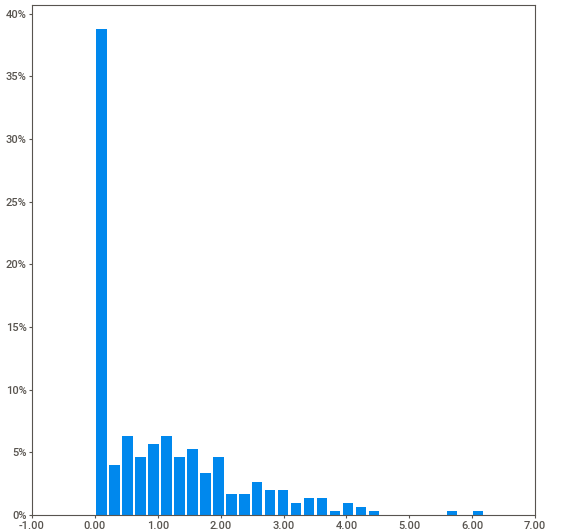
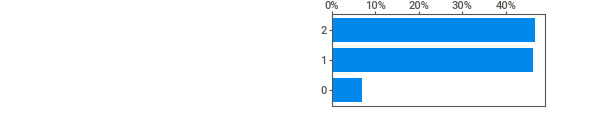
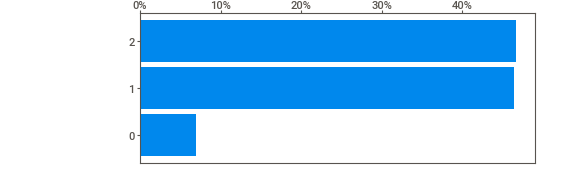
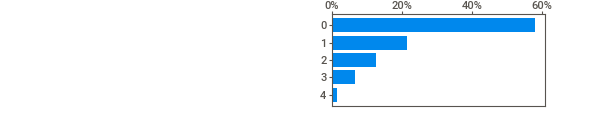
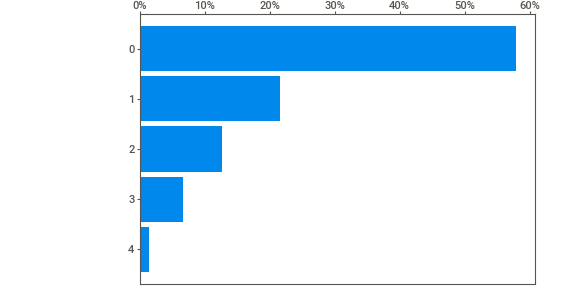
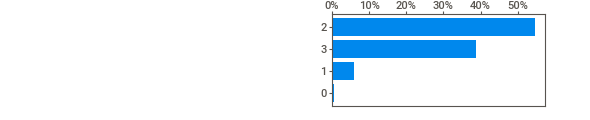
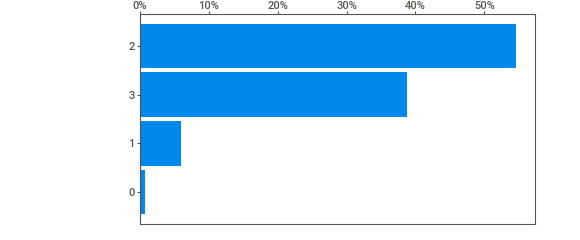
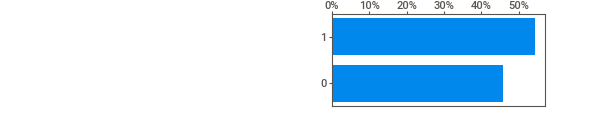
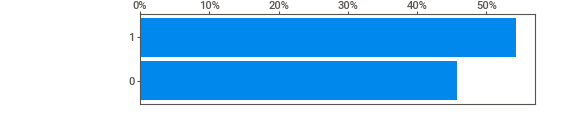
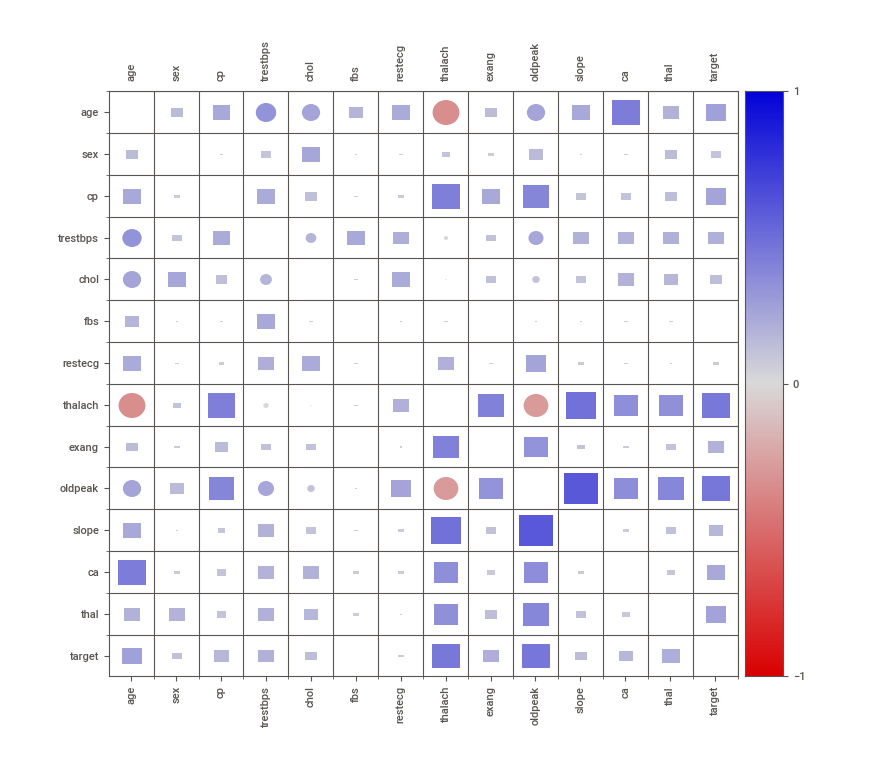
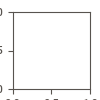

In [137]:
import sweetviz as sv

report = sv.analyze (df)
report.show_notebook()

<Axes: >

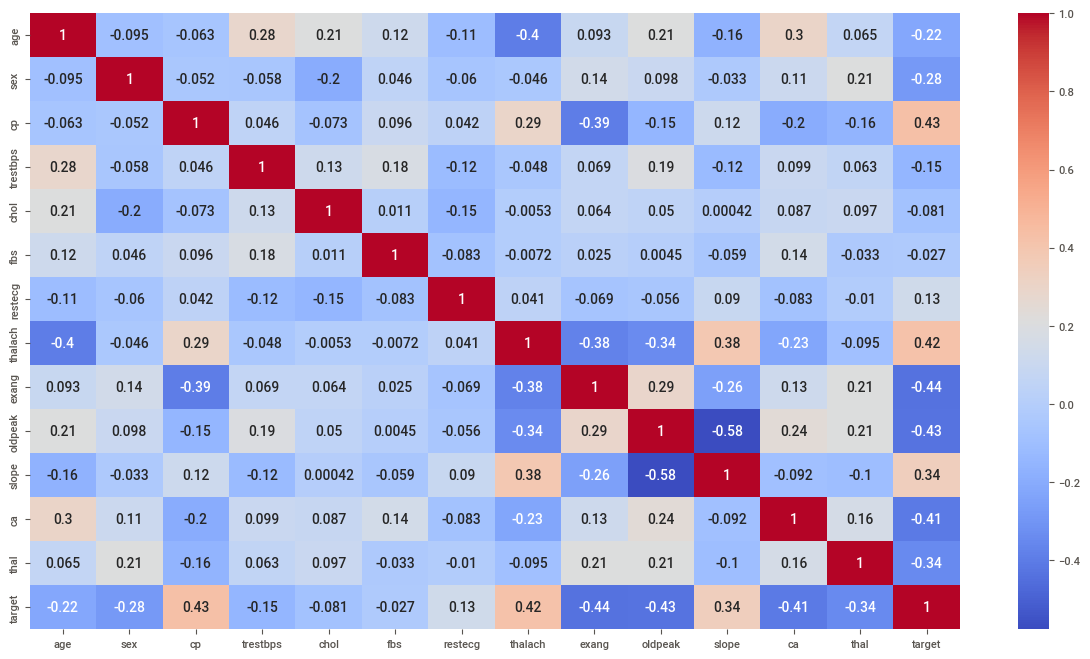

In [138]:
plt.figure (figsize = (15,8))
sns.heatmap (df.corr(), annot = True, cmap = 'coolwarm')

In [139]:
# split data into training and test data
from sklearn.model_selection import train_test_split

In [140]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.2, stratify = y, random_state = 2)

In [141]:
# checking the shape of splitted data
print (x.shape, x_train.shape, x_test.shape)

(302, 13) (241, 13) (61, 13)


## MODEL TRAINING

In [142]:
from sklearn.linear_model import LogisticRegression

In [143]:
model = LogisticRegression ()
model.fit (x_train, y_train)

LogisticRegression()

### MODEL EVALUATION

In [144]:
# Accuracy Score
from sklearn.metrics import accuracy_score

In [145]:
# Check Accuracy on training data
# x_train_prediction = model.predict (x_train)
# training_data_accuracy = accuracy_score (x_train_prediction, y_train)

# print ('Accuracy on Training Data:', training_data_accuracy)

In [146]:
# Accuracy Score on Training Data
train_score = model.score(x_train, y_train)

print ('Accuracy on Training Data:', train_score)

Accuracy on Training Data: 0.8506224066390041


In [147]:
# Check Accuracy Score on Test Data
test_score = model.score (x_test, y_test)

print ('Accuracy on Test Data:', test_score)

Accuracy on Test Data: 0.819672131147541


## BUILDING A PREDICTIVE SYSTEM

In [148]:
input_data = (42,1,0,136,315,0,1,125,1,1.8,1,0,1)


# change the input to numpy array
data = np.array (input_data)

# Reshape the numpy array because we are predicting for just one instance or data point
input_data_reshaped = data.reshape(1, -1)

prediction = model.predict (input_data_reshaped)
print (prediction)


if (prediction == 0):
    print ('This Person doesn\'t have a Heart Disease')
else:
    print ('This Person Has A Heart Disease. Advised To See A Cardiologist ')

[0]
This Person doesn't have a Heart Disease


In [149]:
# Saving The Trained Model
import pickle

filename = 'heart_model.sav'
pickle.dump(model, open (filename, 'wb'))

In [150]:
#Loading the saved model

heart_model = pickle.load (open('heart_model.sav', 'rb'))

In [151]:
input_data = (57,1,0,140,192,0,1,148,0,0.4,1,0,1)


# change the input to numpy array
input_data_as_numpy_array = np.array (input_data)

# Reshape the numpy array because we are predicting for just one instance or data point
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = heart_model.predict (input_data_reshaped)
print (prediction)


if (prediction [0] == 0):
    print ('This Person doesnt have a Heart Disease')
else:
    print ('This Person Has A Heart Disease. See A Cardiologist ')

[1]
This Person Has A Heart Disease. See A Cardiologist 
